In [33]:
!pip install sunpy[all]

In [2]:
import os
from astropy.io import fits
import sunpy.map
#from sunpy.coordinates import NorthOffsetFrame
import astropy.units as u
import numpy as np
from astropy.coordinates import SkyCoord
from sunpy.coordinates import frames
import matplotlib.pyplot as plt
import matplotlib.colors
import glob
from scipy import ndimage
import numpy as np
import sunpy.timeseries
import scipy.ndimage as ndimage
from scipy.ndimage import label
from scipy.optimize import curve_fit
from scipy.interpolate import RegularGridInterpolator
from skimage.transform import resize

In [151]:
folder_path = "/home/anu/Desktop/samapti/carrington"
save_dir1="/home/anu/Desktop/samapti/carrington/South hemisphere"
save_dir2= "/home/anu/Desktop/samapti/carrington/North hemisphere"
save_dir3= "/home/anu/Desktop/samapti/carrington/image"
save_dir4= "/home/anu/Desktop/samapti/carrington/test"
files = os.listdir(folder_path)
fits_files = glob.glob(os.path.join(folder_path, '*.fits'))
print(fits_files)

['/home/anu/Desktop/samapti/carrington/synop_Mr_0.1960.fits']


In [153]:
for file in fits_files:
  with fits.open(file)as f:
    header = f[0].header
    data=f[0].data
    #print(header)
    #print(data)
    #print(data[0:1,])
    #print(data[:,0:1])

In [150]:
print(360/3600)
print(2/720)

0.1
0.002777777777777778


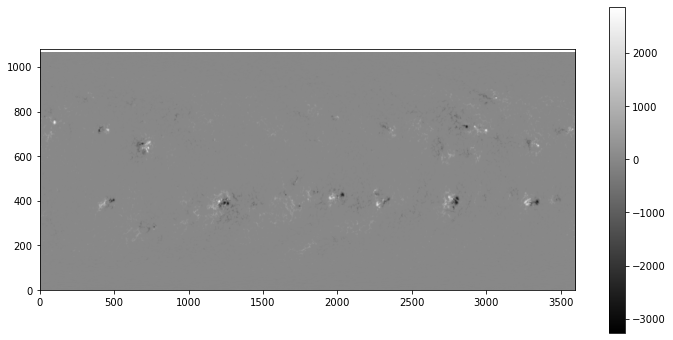

In [124]:
fig = plt.figure(figsize=(12,6))
plt.imshow(data, origin="lower", cmap='gray', aspect=1.5)              #vmax=100, vmin=-100
plt.colorbar()

In [154]:
nx=data.shape[1]
ny=data.shape[0]
print(nx)
print(ny)


3600
1080


In [155]:
longitude=[]
longitude_rad=[]
sinlat=[]
latitude=[]
latitude_rad=[]
coslat=[]
R_sun = 6.96e10
d_sinlat=2/ny
dtr=np.pi/180
rtd=180/np.pi
dlon_rad=(360/nx)*dtr
print(dlon_rad)



for i in range (ny):
  sin_lat= -1+i*(2/ny)
  Latitude_rad= np.arcsin(sin_lat)
  Latitude =Latitude_rad*rtd
  cos_lat=np.cos(Latitude_rad)
  coslat.append(cos_lat)
  latitude.append(Latitude)
  sinlat.append(sin_lat)
  latitude_rad.append(Latitude_rad)
  
for j in range(nx):
    Longitude = 0+j*(360/nx)
    Longitude_rad=Longitude*dtr
    longitude.append(Longitude)
   
  
Flux=(data)*(R_sun**2)*(d_sinlat)*(dlon_rad)
S= (R_sun**2)*(d_sinlat)*(dlon_rad)
print(S)
print(np.nansum(Flux>0))
print(np.nansum(Flux<0))

#print( longitude_rad[1:6])
#print(coslat)
#plt.plot( latitude,coslat)
#fig = plt.figure()
#plt.plot( latitude, sinlat)

0.0017453292519943296
1.56567669432238e+16
1874355
1939924


In [143]:
#print(np.diff( longitude_rad))

[0.00174533 0.00174533 0.00174533 ... 0.00174533 0.00174533 0.00174533]


In [145]:
print(129067-128319)
print(2577388-2565237)

748
12151


In [146]:
print(12151/748)

16.244652406417114


In [127]:

print(100*S)

1.56567669432238e+18


In [128]:
base_name = os.path.basename(file).replace('.fits', '')
lon=np.array(longitude)
Sinlat=np.array( sinlat)
lat=np.array(latitude)
Coslat=np.array(coslat)
latrad=np.array(latitude_rad)
dlat= np.diff(latrad)
#dlat=np.subtract(latrad[1:1080],latrad[0:1079])
#print(Coslat)


X,Y=np.meshgrid(lon, Sinlat )
fig = plt.figure(figsize=(12,6))
plt.pcolormesh(X,Y,Flux, cmap='gray')
plt.colorbar()
image_name= f" {base_name}_.jpeg"
mag_image= os.path.join(save_dir3, image_name)
plt.savefig(mag_image, dpi=300)
plt.close(fig)

x,y=np.meshgrid(lon, lat )
#print(np.diff(y,axis=0))
fig = plt.figure(figsize=(12,6))
plt.pcolormesh(x,y,Flux, cmap='gray')
plt.colorbar()
image_name= f" {base_name}_lat.jpeg"
mag_image= os.path.join(save_dir3, image_name)
plt.savefig(mag_image, dpi=300)
plt.close(fig)

fig = plt.figure(figsize=(12,6))
plt.imshow(Flux,origin="lower", cmap='gray',aspect=1.5)
plt.colorbar()
plt.close(fig)
#plt.plot(dlat1,dlat)


/tmp/ipykernel_63061/3796153067.py:14: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(X,Y,Flux, cmap='gray')
/tmp/ipykernel_63061/3796153067.py:24: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(x,y,Flux, cmap='gray')


In [211]:
#print(8.59865686e-02*1.44531038)

In [212]:
#print(data[100:103,])

(1079,)
<class 'numpy.ndarray'>
(1079,)
1874355
1939924


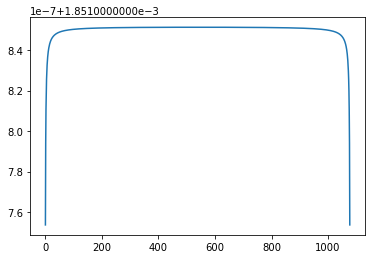

In [129]:
#print(type(dlat))
print(dlat.shape)

coslat_avg=np.mean([coslat[0:1079],coslat[1:]],axis=0)
print(type(coslat_avg))
print(coslat_avg.shape)
#print(coslat[1077:1078])
b=np.multiply(coslat_avg,dlat)
#print(b)
#plt.plot(lat[100:1030],b)
S1=(R_sun**2)*b*(dlon_rad)
#print(S1)
#print(data)
#fig = plt.figure()
#plt.plot(lat[100:1030],S1)
reshapeS1=S1.reshape(-1,1)
#print(reshapeS1)
F=data[:1079,]*S1.reshape(-1,1)
#print(F[100:102,])
#print(Flux[100:102,])
#print(F)
#print(Flux[:1079,])
#plt.pcolormesh(x,y, F, cmap='gray')
#plt.colorbar()
#plt.pcolormesh(x,y, Flux, cmap='gray')
#diffF=np.subtract(F[100:102,],Flux[100:102,])
print(np.nansum(F>0))
print(np.nansum(F<0))
plt.plot(b[1:])




In [130]:
fluxthres1=1.5e18
fluxthres2= -1.5e18
print(fluxthres2)
binary_mask=(Flux>fluxthres1)|(Flux<fluxthres2)
labeled_array, num_features = label(binary_mask)


-1.5e+18


In [131]:
fig=plt.figure(figsize=(12,6))
plt.pcolormesh(x,y, binary_mask, cmap='gray')
image_name= f" {base_name}_binarymask.jpeg"
mag_image= os.path.join(save_dir3, image_name)
plt.savefig(mag_image, dpi=300)
plt.close(fig)



/tmp/ipykernel_63061/1922091522.py:2: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(x,y, binary_mask, cmap='gray')


In [132]:
totflux=ndimage.sum(Flux, labeled_array, range(1, num_features + 1))
Totflux= np.zeros_like(Flux)

for i, val in enumerate(totflux):
    Totflux[labeled_array == (i + 1)] = val




In [133]:
fig=plt.figure(figsize=(12,6))
plt.pcolormesh(x,y, Totflux, cmap='gray')
plt.colorbar()
image_name= f" {base_name}_Totflux.jpeg"
mag_image= os.path.join(save_dir3, image_name)
plt.savefig(mag_image, dpi=300)
plt.close(fig)

/tmp/ipykernel_63061/3124300687.py:2: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(x,y, Totflux, cmap='gray')


In [134]:
regionthres1 = 2e20
regionthres2 = -2e20
binary_mask2=(Totflux>regionthres1)| (Totflux<regionthres2)
#print(binary_mask2.shape)
#print(x.shape)


In [135]:
fig=plt.figure(figsize=(12,6))
plt.pcolormesh(x,y, binary_mask2, cmap='gray')
image_name= f" {base_name}_binarmask2.jpeg"
mag_image= os.path.join(save_dir3, image_name)
plt.savefig(mag_image, dpi=300)
plt.close(fig)

/tmp/ipykernel_63061/1287545201.py:2: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(x,y, binary_mask2, cmap='gray')


In [136]:
y_indices, x_indices = np.where(binary_mask2==1)

Lat=lat[y_indices]
Lon=lon[x_indices]
mask1=(Lat<=0)& (Lat>=-90)
SH_lat=Lat[mask1]
SH_lon=Lon[mask1]
mask2= (Lat<=90) & (Lat>=0)
NH_lat = Lat[mask2]
NH_lon = Lon[mask2]

sorted_indices1= np.argsort(SH_lon)

SHlon_sorted=SH_lon[sorted_indices1]
SHlat_sorted=SH_lat[sorted_indices1]
output1=np.column_stack((SHlon_sorted,SHlat_sorted))
#print(SH_lon)
#print(sorted_indices1)
#print(output1)
sorted_indices2 = np.argsort(NH_lon)
NHlon_sorted= NH_lon[sorted_indices2]
NHlat_sorted = NH_lat[sorted_indices2]
output2 = np.column_stack((NHlon_sorted, NHlat_sorted))
#print(output2)

In [137]:
base_name = os.path.basename(file).replace('.fits', '')
txt_name1= f" {base_name}_SH.txt"
txt1= os.path.join(save_dir1, txt_name1)
txt_name2= f" {base_name}_NH.txt"
txt2= os.path.join(save_dir2, txt_name2)
np.savetxt(txt1,output1)
np.savetxt(txt2, output2)

# latitude=lamda, longitude=fhi

In [138]:
folder_path3="/home/anu/Desktop/samapti/carrington/South hemisphere"
Files = os.listdir(folder_path3)
txt_files = glob.glob(os.path.join(folder_path3, '*.txt'))
RMS=[]

for Sfile in txt_files:
    P=[]
    Q=[]
    print(Sfile)
    with open (Sfile, "r") as infile:
          for line in infile:
            parts=line.split()
            if len(parts)==2:
                fhi=float(parts[0])
                lamda=float(parts[1])
                P.append(fhi)
                Q.append(lamda)
    M=np.array(P)
    def model(lon,p,q1,r1):
        S= (lon*np.pi)/180
        return p+q1*np.sin(S+r1)
    Params, Cov = curve_fit(model,M,Q,method = 'trf')
    print(f"p = {Params[0]}, q1 = {Params[1]}, r1={Params[2]}")
    Y=model(M, *Params)
#print(SY)
    SQ=np.subtract(Q,Y)
#print(SQ)
    mean=np.mean(SQ**2)
#print(Smean)
    rms=np.sqrt(mean)
    print(rms)
    RMS.append(rms)
    #print(RMS)
#print(Srms)
    Error1=model(lon, *Params)+rms
    Error2=model(lon, *Params)-rms
    
    base_name = os.path.basename(file).replace('.txt', '')
    fig = plt.figure(figsize=(12,6))
    plt.plot (lon,model(lon, *Params), color="Red" ,linewidth=1)
    plt.plot(lon,Error1, color="green",linewidth=1)
    plt.plot(lon,Error2, color="blue",linewidth=1)
    plt.pcolormesh(x,y,Flux,cmap='gray')

    plt.xlabel("carington longitutde", color="black", fontsize=14, fontstyle="oblique")
    plt.ylabel(" latitude", color="black", fontsize=14, fontstyle="oblique")
    image_name= f" {base_name}_STF.jpeg"
    mag_image= os.path.join(save_dir4, image_name)
    plt.savefig(mag_image, dpi=300)
    plt.close(fig)

/home/anu/Desktop/samapti/carrington/South hemisphere/ synop_Mr_0.1960_SH.txt
p = -17.89987108632638, q1 = 2.5196595002703255, r1=3.3333394473783327
5.90033836360402


/tmp/ipykernel_63061/932251364.py:43: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(x,y,Flux,cmap='gray')


/home/anu/Desktop/samapti/carrington/South hemisphere/ hmi.Synoptic_Mr.2292_SH.txt
p = -13.879370710979437, q1 = 1.6328532229192603, r1=0.34318210691671863
4.741778520312029


/tmp/ipykernel_63061/932251364.py:43: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(x,y,Flux,cmap='gray')


In [47]:
folder_path3="/home/anu/Desktop/samapti/carrington/South hemisphere"
Files = os.listdir(folder_path3)
txt_files = glob.glob(os.path.join(folder_path3, '*.txt'))

for Sfile in txt_files:
    P=[]
    Q=[]
    print(Sfile)
    with open (Sfile, "r") as infile:
          for line in infile:
            parts=line.split()
            if len(parts)==2:
                fhi=float(parts[0])
                lamda=float(parts[1])
                P.append(fhi)
                Q.append(lamda)
    M=np.array(P)
    def model(lon,p,q1,r1,q2,r2):
        S= (lon*np.pi)/180
        return p+q1*np.sin(S+r1)+q2*np.sin(2*S+r2)
    Params2, Cov2 = curve_fit(model,M,Q,method = 'trf')
    print(f"p = {Params2[0]}, q1 = {Params2[1]}, r1={Params2[2]},q2={Params2[3]},r2={Params2[4]}")
    Y2=model(M, *Params2)
#print(SY)
    SQ=np.subtract(Q,Y2)
#print(SQ)
    mean=np.mean(SQ**2)
#print(Smean)
    rms=np.sqrt(mean)
    print(rms)
    RMS.append(rms)
    #print(RMS)
#print(Srms)
    Error3=model(lon, *Params2)+rms
    Error4=model(lon, *Params2)-rms
    
    base_name = os.path.basename(file).replace('.txt', '')
    fig = plt.figure(figsize=(12,6))
    plt.plot (lon,model(lon, *Params2), color="Red" ,linewidth=1)
    plt.plot(lon,Error3, color="green",linewidth=1)
    plt.plot(lon,Error4, color="blue",linewidth=1)
    plt.pcolormesh(x,y,Flux,cmap='gray')

    plt.xlabel("carington longitutde", color="black", fontsize=14, fontstyle="oblique")
    plt.ylabel(" latitude", color="black", fontsize=14, fontstyle="oblique")
    image_name= f" {base_name}_STF2.jpeg"
    mag_image= os.path.join(save_dir4, image_name)
    plt.savefig(mag_image, dpi=300)
    plt.close(fig)

/home/anu/Desktop/samapti/carrington/South hemisphere/ synop_Mr_0.1960_SH.txt
p = -18.023009087619254, q1 = 2.993716219999704, r1=3.208657495266965,q2=2.2820741112230647,r2=2.5880327035331856
5.709271945403592


/tmp/ipykernel_63061/1758956083.py:42: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(x,y,Flux,cmap='gray')


In [48]:
folder_path3="/home/anu/Desktop/samapti/carrington/South hemisphere"
Files = os.listdir(folder_path3)
txt_files = glob.glob(os.path.join(folder_path3, '*.txt'))

for Sfile in txt_files:
    P=[]
    Q=[]
    print(Sfile)
    with open (Sfile, "r") as infile:
          for line in infile:
            parts=line.split()
            if len(parts)==2:
                fhi=float(parts[0])
                lamda=float(parts[1])
                P.append(fhi)
                Q.append(lamda)
    M=np.array(P)
    def model(lon,p,q1,r1,q2,r2,q3,r3):
        S= (lon*np.pi)/180
        return p+q1*np.sin(S+r1)+q2*np.sin(2*S+r2)+q3*np.sin(3*S+r3)
    Params3, Cov3 = curve_fit(model,M,Q,method = 'trf')
    print(f"p = {Params3[0]}, q1 = {Params3[1]}, r1={Params3[2]},q2={Params3[3]},r2={Params3[4]},q3={Params3[5]},r3={Params3[6]}")
    Y3=model(M, *Params3)
#print(SY)
    SQ=np.subtract(Q,Y3)
#print(SQ)
    mean=np.mean(SQ**2)
#print(Smean)
    rms=np.sqrt(mean)
    print(rms)
    RMS.append(rms)
    
#print(Srms)
    Error5=model(lon, *Params3)+rms
    Error6=model(lon, *Params3)-rms
    
    base_name = os.path.basename(file).replace('.txt', '')
    fig = plt.figure(figsize=(12,6))
    plt.plot (lon,model(lon, *Params3), color="Red" ,linewidth=1)
    plt.plot(lon,Error5, color="green",linewidth=1)
    plt.plot(lon,Error6, color="blue",linewidth=1)
    plt.pcolormesh(x,y,Flux,cmap='gray')

    plt.xlabel("carington longitutde", color="black", fontsize=14, fontstyle="oblique")
    plt.ylabel(" latitude", color="black", fontsize=14, fontstyle="oblique")
    image_name= f" {base_name}_STF3.jpeg"
    mag_image= os.path.join(save_dir4, image_name)
    plt.savefig(mag_image, dpi=300)
    plt.close(fig)

/home/anu/Desktop/samapti/carrington/South hemisphere/ synop_Mr_0.1960_SH.txt
p = -17.676722111478234, q1 = 3.1869447471133747, r1=2.944962970284336,q2=2.8854739626579606,r2=1.9305967571940383,q3=2.65528154277843,r3=0.9657827297851601
5.566362651523858


/tmp/ipykernel_63061/913870987.py:42: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(x,y,Flux,cmap='gray')


In [49]:
folder_path3="/home/anu/Desktop/samapti/carrington/South hemisphere"
Files = os.listdir(folder_path3)
txt_files = glob.glob(os.path.join(folder_path3, '*.txt'))

for Sfile in txt_files:
    P=[]
    Q=[]
    print(Sfile)
    with open (Sfile, "r") as infile:
          for line in infile:
            parts=line.split()
            if len(parts)==2:
                fhi=float(parts[0])
                lamda=float(parts[1])
                P.append(fhi)
                Q.append(lamda)
    M=np.array(P)
    def model(lon,p,q1,r1,q2,r2,q3,r3,q4,r4):
        S= (lon*np.pi)/180
        return p+q1*np.sin(S+r1)+q2*np.sin(2*S+r2)+q3*np.sin(3*S+r3)+q4*np.sin(4*S+r4)
    Params4, Cov4 = curve_fit(model,M,Q,method = 'trf')
    print(f"p = {Params4[0]}, q1 = {Params4[1]}, r1={Params4[2]},q2={Params4[3]},r2={Params4[4]},q3={Params4[5]},r3={Params4[6]},q4={Params4[7]},r4={Params4[8]}")
    Y4=model(M, *Params4)
#print(SY)
    SQ=np.subtract(Q,Y4)
#print(SQ)
    mean=np.mean(SQ**2)
#print(Smean)
    rms=np.sqrt(mean)
    print(rms)
    RMS.append(rms)
#print(Srms)
    Error7=model(lon, *Params4)+rms
    Error8=model(lon, *Params4)-rms
    
    base_name = os.path.basename(file).replace('.txt', '')
    fig = plt.figure(figsize=(12,6))
    plt.plot (lon,model(lon, *Params4), color="Red" ,linewidth=1)
    plt.plot(lon,Error7, color="green",linewidth=1)
    plt.plot(lon,Error8, color="blue",linewidth=1)
    plt.pcolormesh(x,y,Flux,cmap='gray')

    plt.xlabel("carington longitutde", color="black", fontsize=14, fontstyle="oblique")
    plt.ylabel(" latitude", color="black", fontsize=14, fontstyle="oblique")
    image_name= f" {base_name}_STF4.jpeg"
    mag_image= os.path.join(save_dir4, image_name)
    plt.savefig(mag_image, dpi=300)
    plt.close(fig)

/home/anu/Desktop/samapti/carrington/South hemisphere/ synop_Mr_0.1960_SH.txt
p = -17.662790702299485, q1 = 3.731511973383825, r1=2.7179099644520015,q2=3.7283098072080665,r2=1.877430856537913,q3=2.649923229946058,r3=0.6821482938916621,q4=2.4333695053092277,r4=-0.30380598237169254
5.394785217669893


/tmp/ipykernel_63061/2440765152.py:41: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(x,y,Flux,cmap='gray')


In [50]:
folder_path3="/home/anu/Desktop/samapti/carrington/South hemisphere"
Files = os.listdir(folder_path3)
txt_files = glob.glob(os.path.join(folder_path3, '*.txt'))

for Sfile in txt_files:
    P=[]
    Q=[]
    print(Sfile)
    with open (Sfile, "r") as infile:
          for line in infile:
            parts=line.split()
            if len(parts)==2:
                fhi=float(parts[0])
                lamda=float(parts[1])
                P.append(fhi)
                Q.append(lamda)
    M=np.array(P)
    def model(lon,p,q1,r1,q2,r2,q3,r3,q4,r4,q5,r5):
        S= (lon*np.pi)/180
        return p+q1*np.sin(S+r1)+q2*np.sin(2*S+r2)+q3*np.sin(3*S+r3)+q4*np.sin(4*S+r4)+q5*np.sin(5*S+r5)
    Params5, Cov5 = curve_fit(model,M,Q,method = 'trf')
    print(f"p = {Params5[0]}, q1 = {Params5[1]}, r1={Params5[2]},q2={Params5[3]},r2={Params5[4]},q3={Params5[5]},r3={Params5[6]},q4={Params5[7]},r4={Params5[8]},q5={Params5[9]},r5={Params5[10]}")
    Y5=model(M, *Params5)
#print(SY)
    SQ=np.subtract(Q,Y5)
#print(SQ)
    mean=np.mean(SQ**2)
#print(Smean)
    rms=np.sqrt(mean)
    print(rms)
    RMS.append(rms)
    #print(RMS)
#print(Srms)
    Error9=model(lon, *Params5)+rms
    Error10=model(lon, *Params5)-rms
    
    base_name = os.path.basename(file).replace('.txt', '')
    fig = plt.figure(figsize=(12,6))
    plt.plot (lon,model(lon, *Params5), color="Red" ,linewidth=1)
    plt.plot(lon,Error9, color="green",linewidth=1)
    plt.plot(lon,Error10, color="blue",linewidth=1)
    plt.pcolormesh(x,y,Flux,cmap='gray')

    plt.xlabel("carington longitutde", color="black", fontsize=14, fontstyle="oblique")
    plt.ylabel(" latitude", color="black", fontsize=14, fontstyle="oblique")
    image_name= f" {base_name}_STF5.jpeg"
    mag_image= os.path.join(save_dir4, image_name)
    plt.savefig(mag_image, dpi=300)
    plt.close(fig)

/home/anu/Desktop/samapti/carrington/South hemisphere/ synop_Mr_0.1960_SH.txt
p = -17.610485625788485, q1 = 4.021759138678438, r1=2.769902955616646,q2=3.3037270650478345,r2=1.8750770223970115,q3=2.7589729840163386,r3=0.5950583331629001,q4=2.88411499042464,r4=-0.38852277759554654,q5=1.580404433173207,r5=-1.1172455447090528
5.310963102165824


/tmp/ipykernel_63061/2071667880.py:42: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(x,y,Flux,cmap='gray')


In [51]:
folder_path3="/home/anu/Desktop/samapti/carrington/South hemisphere"
Files = os.listdir(folder_path3)
txt_files = glob.glob(os.path.join(folder_path3, '*.txt'))

for Sfile in txt_files:
    P=[]
    Q=[]
    print(Sfile)
    with open (Sfile, "r") as infile:
          for line in infile:
            parts=line.split()
            if len(parts)==2:
                fhi=float(parts[0])
                lamda=float(parts[1])
                P.append(fhi)
                Q.append(lamda)
    M=np.array(P)
    def model(lon,p,q1,r1,q2,r2,q3,r3,q4,r4,q5,r5,q6,r6):
        S= (lon*np.pi)/180
        return p+q1*np.sin(S+r1)+q2*np.sin(2*S+r2)+q3*np.sin(3*S+r3)+q4*np.sin(4*S+r4)+q5*np.sin(5*S+r5)+q6*np.sin(6*S+r6)
    Params6, Cov6 = curve_fit(model,M,Q,method = 'trf')
    print(f"p = {Params6[0]}, q1 = {Params6[1]}, r1={Params6[2]},q2={Params6[3]},r2={Params6[4]},q3={Params6[5]},r3={Params6[6]},q4={Params6[7]},r4={Params6[8]},q5={Params6[9]},r5={Params6[10]},q6={Params6[11]},r6={Params6[12]}")
    Y6=model(M, *Params6)
#print(SY)
    SQ=np.subtract(Q,Y6)
#print(SQ)
    mean=np.mean(SQ**2)
#print(Smean)
    rms=np.sqrt(mean)
    print(rms)
    RMS.append(rms)
    #print(RMS)
#print(Srms)
    Error11=model(lon, *Params6)+rms
    Error12=model(lon, *Params6)-rms
    
    base_name = os.path.basename(file).replace('.txt', '')
    fig = plt.figure(figsize=(12,6))
    plt.plot (lon,model(lon, *Params6), color="Red" ,linewidth=1)
    plt.plot(lon,Error11, color="green",linewidth=1)
    plt.plot(lon,Error12, color="blue",linewidth=1)
    plt.pcolormesh(x,y,Flux,cmap='gray')

    plt.xlabel("carington longitutde", color="black", fontsize=14, fontstyle="oblique")
    plt.ylabel(" latitude", color="black", fontsize=14, fontstyle="oblique")
    image_name= f" {base_name}_STF6.jpeg"
    mag_image= os.path.join(save_dir4, image_name)
    plt.savefig(mag_image, dpi=300)
    plt.close(fig)

/home/anu/Desktop/samapti/carrington/South hemisphere/ synop_Mr_0.1960_SH.txt
p = -17.735489917941848, q1 = 3.8234565420493434, r1=2.8168731588825353,q2=3.20158491230236,r2=1.8828970460430023,q3=2.7032479766325164,r3=0.6011181390595008,q4=2.7913153424055483,r4=-0.419571692226919,q5=1.6203412364045846,r5=-1.2231157735730953,q6=-0.31786241699505347,r6=1.1643522987019967
5.308418356080656


/tmp/ipykernel_63061/2989689259.py:42: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(x,y,Flux,cmap='gray')


In [52]:
folder_path3="/home/anu/Desktop/samapti/carrington/South hemisphere"
Files = os.listdir(folder_path3)
txt_files = glob.glob(os.path.join(folder_path3, '*.txt'))

for Sfile in txt_files:
    P=[]
    Q=[]
    print(Sfile)
    with open (Sfile, "r") as infile:
          for line in infile:
            parts=line.split()
            if len(parts)==2:
                fhi=float(parts[0])
                lamda=float(parts[1])
                P.append(fhi)
                Q.append(lamda)
    M=np.array(P)
    def model(lon,p,q1,r1,q2,r2,q3,r3,q4,r4,q5,r5,q6,r6,q7,r7):
        S= (lon*np.pi)/180
        return p+q1*np.sin(S+r1)+q2*np.sin(2*S+r2)+q3*np.sin(3*S+r3)+q4*np.sin(4*S+r4)+q5*np.sin(5*S+r5)+q6*np.sin(6*S+r6)+q7*np.sin(7*S+r7)
    Params7, Cov7 = curve_fit(model,M,Q,method = 'trf')
    print(f"p = {Params7[0]}, q1 = {Params7[1]}, r1={Params7[2]},q2={Params7[3]},r2={Params7[4]},q3={Params7[5]},r3={Params7[6]},q4={Params7[7]},r4={Params7[8]},q5={Params7[9]},r5={Params7[10]},q6={Params7[11]},r6={Params7[12]},q7={Params7[13]},r7={Params7[14]}")
    Y7=model(M, *Params7)
#print(SY)
    SQ=np.subtract(Q,Y7)
#print(SQ)
    mean=np.mean(SQ**2)
#print(Smean)
    rms=np.sqrt(mean)
    print(rms)
    RMS.append(rms)
    #print(RMS)
#print(Srms)
    Error13=model(lon, *Params7)+rms
    Error14=model(lon, *Params7)-rms
    
    base_name = os.path.basename(file).replace('.txt', '')
    fig = plt.figure(figsize=(12,6))
    plt.plot (lon,model(lon, *Params7), color="Red" ,linewidth=1)
    plt.plot(lon,Error13, color="green",linewidth=1)
    plt.plot(lon,Error14, color="blue",linewidth=1)
    plt.pcolormesh(x,y,Flux,cmap='gray')

    plt.xlabel("carington longitutde", color="black", fontsize=14, fontstyle="oblique")
    plt.ylabel(" latitude", color="black", fontsize=14, fontstyle="oblique")
    image_name= f" {base_name}_STF7.jpeg"
    mag_image= os.path.join(save_dir4, image_name)
    plt.savefig(mag_image, dpi=300)
    plt.close(fig)

/home/anu/Desktop/samapti/carrington/South hemisphere/ synop_Mr_0.1960_SH.txt
p = -18.221244724972344, q1 = 4.2744713766856535, r1=3.1791558795091412,q2=2.6286046482522383,r2=2.445276143137297,q3=1.503618872712335,r3=0.4257054215700186,q4=2.342098686446767,r4=-0.8295438203602369,q5=1.6439110801049523,r5=-1.7568983087676964,q6=-1.1023321962601687,r6=-0.1300416857321991,q7=1.3097244048996557,r7=2.74059217206699
5.274402456558634


/tmp/ipykernel_63061/2801736065.py:42: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(x,y,Flux,cmap='gray')


In [53]:
folder_path3="/home/anu/Desktop/samapti/carrington/South hemisphere"
Files = os.listdir(folder_path3)
txt_files = glob.glob(os.path.join(folder_path3, '*.txt'))

for Sfile in txt_files:
    P=[]
    Q=[]
    print(Sfile)
    with open (Sfile, "r") as infile:
          for line in infile:
            parts=line.split()
            if len(parts)==2:
                fhi=float(parts[0])
                lamda=float(parts[1])
                P.append(fhi)
                Q.append(lamda)
    M=np.array(P)
    def model(lon,p,q1,r1,q2,r2,q3,r3,q4,r4,q5,r5,q6,r6,q7,r7,q8,r8):
        S= (lon*np.pi)/180
        return p+q1*np.sin(S+r1)+q2*np.sin(2*S+r2)+q3*np.sin(3*S+r3)+q4*np.sin(4*S+r4)+q5*np.sin(5*S+r5)+q6*np.sin(6*S+r6)+q7*np.sin(7*S+r7)+q8*np.sin(8*S+r8)
    Params8, Cov8 = curve_fit(model,M,Q,method = 'trf')
    print(f"p = {Params8[0]}, q1 = {Params8[1]}, r1={Params8[2]},q2={Params8[3]},r2={Params8[4]},q3={Params8[5]},r3={Params8[6]},q4={Params8[7]},r4={Params8[8]},q5={Params8[9]},r5={Params8[10]},q6={Params8[11]},r6={Params8[12]},q7={Params8[13]},r7={Params8[14]},q8={Params8[15]},r8={Params8[16]}")
    Y8=model(M, *Params8)
#print(SY)
    SQ=np.subtract(Q,Y8)
#print(SQ)
    mean=np.mean(SQ**2)
#print(Smean)
    rms=np.sqrt(mean)
    print(rms)
    RMS.append(rms)
    #print(RMS)
#print(Srms)
    Error15=model(lon, *Params8)+rms
    Error16=model(lon, *Params8)-rms
    
    base_name = os.path.basename(file).replace('.txt', '')
    fig = plt.figure(figsize=(12,6))
    plt.plot (lon,model(lon, *Params8), color="Red" ,linewidth=1)
    plt.plot(lon,Error15, color="green",linewidth=1)
    plt.plot(lon,Error16, color="blue",linewidth=1)
    plt.pcolormesh(x,y,Flux,cmap='gray')

    plt.xlabel("carington longitutde", color="black", fontsize=14, fontstyle="oblique")
    plt.ylabel(" latitude", color="black", fontsize=14, fontstyle="oblique")
    image_name= f" {base_name}_STF8.jpeg"
    mag_image= os.path.join(save_dir4, image_name)
    plt.savefig(mag_image, dpi=300)
    plt.close(fig)

/home/anu/Desktop/samapti/carrington/South hemisphere/ synop_Mr_0.1960_SH.txt
p = -18.395442658706084, q1 = 4.525938560130052, r1=3.262064245807189,q2=2.6100231525332704,r2=2.6732715881122653,q3=0.9901393267966689,r3=0.2349419294491009,q4=2.275149268838589,r4=-0.9761297616043525,q5=-1.7595268473248733,r5=7.524342958347038,q6=-1.332226415717868,r6=-0.11951569720664204,q7=1.606332933924349,r7=2.731579958410309,q8=0.4205530867633588,r8=2.669904200166163
5.271050206644738


/tmp/ipykernel_63061/3514461285.py:42: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(x,y,Flux,cmap='gray')


In [57]:
folder_path3="/home/anu/Desktop/samapti/carrington/South hemisphere"
Files = os.listdir(folder_path3)
txt_files = glob.glob(os.path.join(folder_path3, '*.txt'))

for Sfile in txt_files:
    P=[]
    Q=[]
    print(Sfile)
    with open (Sfile, "r") as infile:
          for line in infile:
            parts=line.split()
            if len(parts)==2:
                fhi=float(parts[0])
                lamda=float(parts[1])
                P.append(fhi)
                Q.append(lamda)
    M=np.array(P)
    def model(lon,p,q1,r1,q2,r2,q3,r3,q4,r4,q5,r5,q6,r6,q7,r7,q8,r8,q9,r9):
        S= (lon*np.pi)/180
        return p+q1*np.sin(S+r1)+q2*np.sin(2*S+r2)+q3*np.sin(3*S+r3)+q4*np.sin(4*S+r4)+q5*np.sin(5*S+r5)+q6*np.sin(6*S+r6)+q7*np.sin(7*S+r7)+q8*np.sin(8*S+r8)+q9*np.sin(9*S+r9)
    Params9, Cov9 = curve_fit(model,M,Q,method = 'trf')
    print(f"p = {Params9[0]}, q1 = {Params9[1]}, r1={Params9[2]},q2={Params9[3]},r2={Params9[4]},q3={Params9[5]},r3={Params9[6]},q4={Params9[7]},r4={Params9[8]},q5={Params9[9]},r5={Params9[10]},q6={Params9[11]},r6={Params9[12]},q7={Params9[13]},r7={Params9[14]},q8={Params9[15]},r8={Params9[16]},q9={Params9[17]},r9={Params9[18]}")
    Y9=model(M, *Params9)
#print(SY)
    SQ=np.subtract(Q,Y9)
#print(SQ)
    mean=np.mean(SQ**2)
#print(Smean)
    rms=np.sqrt(mean)
    print(rms)
    RMS.append(rms)
    #print(RMS)
#print(Srms)
    Error17=model(lon, *Params9)+rms
    Error18=model(lon, *Params9)-rms
    
    base_name = os.path.basename(file).replace('.txt', '')
    fig = plt.figure(figsize=(12,6))
    plt.plot (lon,model(lon, *Params9), color="Red" ,linewidth=1)
    plt.plot(lon,Error17, color="green",linewidth=1)
    plt.plot(lon,Error18, color="blue",linewidth=1)
    plt.pcolormesh(x,y,Flux,cmap='gray')

    plt.xlabel("carington longitutde", color="black", fontsize=14, fontstyle="oblique")
    plt.ylabel(" latitude", color="black", fontsize=14, fontstyle="oblique")
    image_name= f" {base_name}_STF9.jpeg"
    mag_image= os.path.join(save_dir4, image_name)
    plt.savefig(mag_image, dpi=300)
    plt.close(fig)

/home/anu/Desktop/samapti/carrington/South hemisphere/ synop_Mr_0.1960_SH.txt
p = -19.9577233825881, q1 = 5.895711678076643, r1=3.715769306434961,q2=4.023500862505392,r2=3.360143300270503,q3=2.155776023221749,r3=3.7120521707726213,q4=2.8211614557833866,r4=-2.183820032768665,q5=2.835790044890877,r5=-2.5812480547256205,q6=-2.9039952460269625,r6=-0.23960486385286883,q7=3.111872390890272,r7=2.582317165788666,q8=2.105191753549183,r8=2.0540244771310716,q9=2.2449049894477704,r9=1.8054576725206564
5.178317740057429


/tmp/ipykernel_63061/3439020623.py:42: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(x,y,Flux,cmap='gray')


In [59]:
folder_path3="/home/anu/Desktop/samapti/carrington/South hemisphere"
Files = os.listdir(folder_path3)
txt_files = glob.glob(os.path.join(folder_path3, '*.txt'))

for Sfile in txt_files:
    P=[]
    Q=[]
    print(Sfile)
    with open (Sfile, "r") as infile:
          for line in infile:
            parts=line.split()
            if len(parts)==2:
                fhi=float(parts[0])
                lamda=float(parts[1])
                P.append(fhi)
                Q.append(lamda)
    M=np.array(P)
    def model(lon,p,q1,r1,q2,r2,q3,r3,q4,r4,q5,r5,q6,r6,q7,r7,q8,r8,q9,r9,q10,r10):
        S= (lon*np.pi)/180
        return p+q1*np.sin(S+r1)+q2*np.sin(2*S+r2)+q3*np.sin(3*S+r3)+q4*np.sin(4*S+r4)+q5*np.sin(5*S+r5)+q6*np.sin(6*S+r6)+q7*np.sin(7*S+r7)+q8*np.sin(8*S+r8)+q9*np.sin(9*S+r9)+q10*np.sin(10*S+r10)
    Params10, Cov10 = curve_fit(model,M,Q,method = 'trf')
    print(f"p = {Params10[0]}, q1 = {Params10[1]}, r1={Params10[2]},q2={Params10[3]},r2={Params10[4]},q3={Params10[5]},r3={Params10[6]},q4={Params10[7]},r4={Params10[8]},q5={Params10[9]},r5={Params10[10]},q6={Params10[11]},r6={Params10[12]},q7={Params10[13]},r7={Params10[14]},q8={Params10[15]},r8={Params10[16]},q9={Params10[17]},r9={Params10[18]},q10={Params10[19]},r10={Params10[20]}")
    Y10=model(M, *Params10)
#print(SY)
    SQ=np.subtract(Q,Y10)
#print(SQ)
    mean=np.mean(SQ**2)
#print(Smean)
    rms=np.sqrt(mean)
    print(rms)
    #RMS.append(rms)
    #print(RMS)
#print(Srms)
    Error19=model(lon, *Params10)+rms
    Error20=model(lon, *Params10)-rms
    
    base_name = os.path.basename(file).replace('.txt', '')
    fig = plt.figure(figsize=(12,6))
    plt.plot (lon,model(lon, *Params10), color="Red" ,linewidth=1)
    plt.plot(lon,Error19, color="green",linewidth=1)
    plt.plot(lon,Error20, color="blue",linewidth=1)
    plt.pcolormesh(x,y,Flux,cmap='gray')

    plt.xlabel("carington longitutde", color="black", fontsize=14, fontstyle="oblique")
    plt.ylabel(" latitude", color="black", fontsize=14, fontstyle="oblique")
    image_name= f" {base_name}_STF10.jpeg"
    mag_image= os.path.join(save_dir4, image_name)
    plt.savefig(mag_image, dpi=300)
    plt.close(fig)


/home/anu/Desktop/samapti/carrington/South hemisphere/ synop_Mr_0.1960_SH.txt
p = -19.36820622216119, q1 = 5.137948783871174, r1=3.55934422047762,q2=3.452203379159575,r2=3.1904683918360965,q3=-1.3408309304933987,r3=0.6851456670757646,q4=2.139311415150913,r4=-1.867341371075402,q5=-2.0863137877690603,r5=0.7949826830494235,q6=-2.2127797701074443,r6=-0.2139492496130945,q7=2.58172409238049,r7=2.58478767844807,q8=1.6500963623753515,r8=2.0506353905072108,q9=1.647626745918492,r9=1.8014980226489854,q10=0.7486307966538897,r10=-1.2248585900128819
5.16757197991091


/tmp/ipykernel_63061/2110041423.py:42: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(x,y,Flux,cmap='gray')


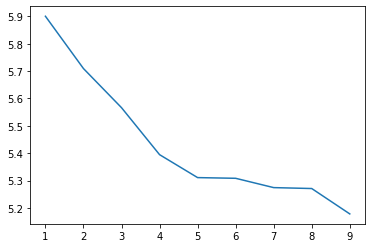

In [55]:
M=[1,2,3,4,5,6,7,8,9]

plt.plot(M,RMS)

In [91]:
folder_path3="/home/anu/Desktop/samapti/carrington/North hemisphere"
Files = os.listdir(folder_path3)
txt_files = glob.glob(os.path.join(folder_path3, '*.txt'))
RMS=[]

for Nfile in txt_files:
    A=[]
    B=[]
    print(Nfile)
    with open (Nfile, "r") as infile:
          for line in infile:
            parts=line.split()
            if len(parts)==2:
                fhi=float(parts[0])
                lamda=float(parts[1])
                A.append(fhi)
                B.append(lamda)
    N=np.array(A)
    def model(lon,a,b1,c1):
        S= (lon*np.pi)/180
        return a+b1*np.sin(S+c1)
    params1, Cov1 = curve_fit(model,N,B,method = 'trf')
    print(f"a= {params1[0]}, b= {params1[1]}, c={params1[2]}")
    Y1=model(N, *params1)
#print(SY)
    NB=np.subtract(B,Y1)
#print(SQ)
    mean=np.mean(NB**2)
#print(Smean)
    rms=np.sqrt(mean)
    print(rms)
    RMS.append(rms)
    
    
#print(Srms)
    error1=model(lon, *params1)+rms
    error2=model(lon, *params1)-rms
    
    base_name = os.path.basename(file).replace('.txt', '')
    fig = plt.figure(figsize=(12,6))
    plt.plot (lon,model(lon, *params1), color="Red" ,linewidth=1)
    plt.plot(lon,error1, color="green",linewidth=1)
    plt.plot(lon,error2, color="blue",linewidth=1)
    plt.pcolormesh(x,y,Flux,cmap='gray')

    plt.xlabel("carington longitutde", color="black", fontsize=14, fontstyle="oblique")
    plt.ylabel(" latitude", color="black", fontsize=14, fontstyle="oblique")
    image_name= f" {base_name}_NTF.jpeg"
    mag_image= os.path.join(save_dir4, image_name)
    plt.savefig(mag_image, dpi=300)
    plt.close(fig)

/home/anu/Desktop/samapti/carrington/North hemisphere/ synop_Mr_0.1960_NH.txt
a= 18.476026518428423, b= 1.9253667330208963, c=3.1742824914212493
8.573605809854731


/tmp/ipykernel_63061/2925852267.py:44: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(x,y,Flux,cmap='gray')


In [92]:
folder_path3="/home/anu/Desktop/samapti/carrington/North hemisphere"
Files = os.listdir(folder_path3)
txt_files = glob.glob(os.path.join(folder_path3, '*.txt'))

for Nfile in txt_files:
    A=[]
    B=[]
    print(Nfile)
    with open (Nfile, "r") as infile:
          for line in infile:
            parts=line.split()
            if len(parts)==2:
                fhi=float(parts[0])
                lamda=float(parts[1])
                A.append(fhi)
                B.append(lamda)
    N=np.array(A)
    def model(lon,a,b1,c1,b2,c2):
        S= (lon*np.pi)/180
        return a+b1*np.sin(S+c1)+b2*np.sin(2*S+c2)
    params2, Cov2 = curve_fit(model,N,B,method = 'trf')
    print(f"a= {params2[0]}, b1= {params2[1]}, c1={params2[2]},b2={params2[3]},c2={params2[4]}")
    Y2=model(N, *params2)
#print(SY)
    NB=np.subtract(B,Y2)
#print(SQ)
    mean=np.mean(NB**2)
#print(Smean)
    rms=np.sqrt(mean)
    print(rms)
    RMS.append(rms)
    error3=model(lon, *params2)+rms
    error4=model(lon, *params2)-rms
    
    base_name = os.path.basename(file).replace('.txt', '')
    fig = plt.figure(figsize=(12,6))
    plt.plot (lon,model(lon, *params2), color="Red" ,linewidth=1)
    plt.plot(lon,error3, color="green",linewidth=1)
    plt.plot(lon,error4, color="blue",linewidth=1)
    plt.pcolormesh(x,y,Flux,cmap='gray')

    plt.xlabel("carington longitutde", color="black", fontsize=14, fontstyle="oblique")
    plt.ylabel(" latitude", color="black", fontsize=14, fontstyle="oblique")
    image_name= f" {base_name}_NTF2.jpeg"
    mag_image= os.path.join(save_dir4, image_name)
    plt.savefig(mag_image, dpi=300)
    plt.close(fig)

/home/anu/Desktop/samapti/carrington/North hemisphere/ synop_Mr_0.1960_NH.txt
a= 19.745648756475322, b1= 2.4529641665282553, c1=4.079915500424769,b2=-2.7351656516635034,c2=17.91116118528341
8.412081580588778


/tmp/ipykernel_63061/1812859256.py:40: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(x,y,Flux,cmap='gray')


In [93]:
folder_path3="/home/anu/Desktop/samapti/carrington/North hemisphere"
Files = os.listdir(folder_path3)
txt_files = glob.glob(os.path.join(folder_path3, '*.txt'))

for Nfile in txt_files:
    A=[]
    B=[]
    print(Nfile)
    with open (Nfile, "r") as infile:
          for line in infile:
            parts=line.split()
            if len(parts)==2:
                fhi=float(parts[0])
                lamda=float(parts[1])
                A.append(fhi)
                B.append(lamda)
    N=np.array(A)
    def model(lon,a,b1,c1,b2,c2,b3,c3):
        S= (lon*np.pi)/180
        return a+b1*np.sin(S+c1)+b2*np.sin(2*S+c2)+b3*np.sin(3*S+c3)
    params3, Cov3 = curve_fit(model,N,B,method = 'trf')
    print(f"a= {params3[0]}, b1= {params3[1]}, c1={params3[2]},b2={params3[3]},c2={params3[4]},b3={params3[5]},c3={params3[6]}")
    Y3=model(N, *params3)
#print(SY)
    NB=np.subtract(B,Y3)
#print(SQ)
    mean=np.mean(NB**2)
#print(Smean)
    rms=np.sqrt(mean)
    print(rms)
    RMS.append(rms)
    error5=model(lon, *params3)+rms
    error6=model(lon, *params3)-rms
    
    base_name = os.path.basename(file).replace('.txt', '')
    fig = plt.figure(figsize=(12,6))
    plt.plot (lon,model(lon, *params3), color="Red" ,linewidth=1)
    plt.plot(lon,error5, color="green",linewidth=1)
    plt.plot(lon,error6, color="blue",linewidth=1)
    plt.pcolormesh(x,y,Flux,cmap='gray')

    plt.xlabel("carington longitutde", color="black", fontsize=14, fontstyle="oblique")
    plt.ylabel(" latitude", color="black", fontsize=14, fontstyle="oblique")
    image_name= f" {base_name}_NTF3.jpeg"
    mag_image= os.path.join(save_dir4, image_name)
    plt.savefig(mag_image, dpi=300)
    plt.close(fig)

/home/anu/Desktop/samapti/carrington/North hemisphere/ synop_Mr_0.1960_NH.txt
a= 19.592210087269294, b1= 2.589349676703581, c1=4.096763787509294,b2=-4.084720941988768,c2=-1.2635681417980273,b3=2.803787677633395,c3=-0.8460868185768674
8.266635177637706


/tmp/ipykernel_63061/3437304033.py:40: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(x,y,Flux,cmap='gray')


In [94]:
folder_path3="/home/anu/Desktop/samapti/carrington/North hemisphere"
Files = os.listdir(folder_path3)
txt_files = glob.glob(os.path.join(folder_path3, '*.txt'))

for Nfile in txt_files:
    A=[]
    B=[]
    print(Nfile)
    with open (Nfile, "r") as infile:
          for line in infile:
            parts=line.split()
            if len(parts)==2:
                fhi=float(parts[0])
                lamda=float(parts[1])
                A.append(fhi)
                B.append(lamda)
    N=np.array(A)
    def model(lon,a,b1,c1,b2,c2,b3,c3,b4,c4):
        S= (lon*np.pi)/180
        return a+b1*np.sin(S+c1)+b2*np.sin(2*S+c2)+b3*np.sin(3*S+c3)+b4*np.sin(4*S+c4)
    params4, Cov4 = curve_fit(model,N,B,method = 'trf')
    print(f"a= {params4[0]}, b1= {params4[1]}, c1={params4[2]},b2={params4[3]},c2={params4[4]},b3={params4[5]},c3={params4[6]},b4={params4[7]},c4={params4[8]}")
    Y4=model(N, *params4)
#print(SY)
    NB=np.subtract(B,Y4)
#print(SQ)
    mean=np.mean(NB**2)
#print(Smean)
    rms=np.sqrt(mean)
    print(rms)
    RMS.append(rms)
    error7=model(lon, *params4)+rms
    error8=model(lon, *params4)-rms
    
    base_name = os.path.basename(file).replace('.txt', '')
    fig = plt.figure(figsize=(12,6))
    plt.plot (lon,model(lon, *params4), color="Red" ,linewidth=1)
    plt.plot(lon,error7, color="green",linewidth=1)
    plt.plot(lon,error8, color="blue",linewidth=1)
    plt.pcolormesh(x,y,Flux,cmap='gray')

    plt.xlabel("carington longitutde", color="black", fontsize=14, fontstyle="oblique")
    plt.ylabel(" latitude", color="black", fontsize=14, fontstyle="oblique")
    image_name= f" {base_name}_NTF4.jpeg"
    mag_image= os.path.join(save_dir4, image_name)
    plt.savefig(mag_image, dpi=300)
    plt.close(fig)

/home/anu/Desktop/samapti/carrington/North hemisphere/ synop_Mr_0.1960_NH.txt
a= 21.02774268768572, b1= -2.5815742600675975, c1=14.134532942159518,b2=-2.454563832433087,c2=-1.4930566059387025,b3=-0.4589100544653747,c3=-1.350576436557473,b4=5.56080025027376,c4=-0.4014702848815793
7.723949023659128


/tmp/ipykernel_63061/1212127801.py:40: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(x,y,Flux,cmap='gray')


In [95]:

folder_path3="/home/anu/Desktop/samapti/carrington/North hemisphere"
Files = os.listdir(folder_path3)
txt_files = glob.glob(os.path.join(folder_path3, '*.txt'))

for Nfile in txt_files:
    A=[]
    B=[]
 
    with open (Nfile, "r") as infile:
          for line in infile:
            parts=line.split()
            if len(parts)==2:
                fhi=float(parts[0])
                lamda=float(parts[1])
                A.append(fhi)
                B.append(lamda)
    N=np.array(A)
    def model(lon,a,b1,c1,b2,c2,b3,c3,b4,c4,b5,c5):
        S= (lon*np.pi)/180
        return a+b1*np.sin(S+c1)+b2*np.sin(2*S+c2)+b3*np.sin(3*S+c3)+b4*np.sin(4*S+c4)+b5*np.sin(5*S+c5)
    params5, Cov5 = curve_fit(model,N,B,method = 'trf')
    print(f"a= {params5[0]}, b1= {params5[1]}, c1={params5[2]},b2={params5[3]},c2={params5[4]},b3={params5[5]},c3={params5[6]},b4={params5[7]},c4={params5[8]},b5={params5[9]},c5={params5[10]}")
    Y5=model(N, *params5)
#print(SY)
    NB=np.subtract(B,Y5)
#print(SQ)
    mean=np.mean(NB**2)
#print(Smean)
    rms=np.sqrt(mean)
    print(rms)
    RMS.append(rms)
    error9=model(lon, *params5)+rms
    error10=model(lon, *params5)-rms
    
    base_name = os.path.basename(file).replace('.txt', '')
    fig = plt.figure(figsize=(12,6))
    plt.plot (lon,model(lon, *params5), color="Red" ,linewidth=1)
    plt.plot(lon,error9, color="green",linewidth=1)
    plt.plot(lon,error10, color="blue",linewidth=1)
    plt.pcolormesh(x,y,Flux,cmap='gray')

    plt.xlabel("carington longitutde", color="black", fontsize=14, fontstyle="oblique")
    plt.ylabel(" latitude", color="black", fontsize=14, fontstyle="oblique")
    image_name= f" {base_name}_NTF5.jpeg"
    mag_image= os.path.join(save_dir4, image_name)
    plt.savefig(mag_image, dpi=300)
    plt.close(fig)


a= 20.433786956916677, b1= -1.0807570404429558, c1=1.1723575313804895,b2=-2.220962101466413,c2=-1.7724736615928174,b3=1.0159896467972942,c3=-7.628742656436366,b4=4.174699411465753,c4=0.04974685234779042,b5=3.606077252473304,c5=-0.6647252321299327
7.573995807211322


/tmp/ipykernel_63061/4006259608.py:40: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(x,y,Flux,cmap='gray')


In [102]:
folder_path3="/home/anu/Desktop/samapti/carrington/North hemisphere"
Files = os.listdir(folder_path3)
txt_files = glob.glob(os.path.join(folder_path3, '*.txt'))

for Nfile in txt_files:
    A=[]
    B=[]
    print(Nfile)
    with open (Nfile, "r") as infile:
          for line in infile:
            parts=line.split()
            if len(parts)==2:
                fhi=float(parts[0])
                lamda=float(parts[1])
                A.append(fhi)
                B.append(lamda)
    N=np.array(A)
    def model(lon,a,b1,c1,b2,c2,b3,c3,b4,c4,b5,c5,b6,c6):
        S= (lon*np.pi)/180
        return a+b1*np.sin(S+c1)+b2*np.sin(2*S+c2)+b3*np.sin(3*S+c3)+b4*np.sin(4*S+c4)+b5*np.sin(5*S+c5)+b6*np.sin(6*S+c6)
    params6, Cov6 = curve_fit(model,N,B,method = 'trf')
    print(f"a= {params6[0]}, b1= {params6[1]}, c1={params6[2]},b2={params6[3]},c2={params6[4]},b3={params6[5]},c3={params6[6]},b4={params6[7]},c4={params6[8]},b5={params6[9]},c5={params6[10]},b6={params6[11]},c6={params6[12]}")
    Y6=model(N, *params6)
#print(SY)
    NB=np.subtract(B,Y6)
#print(SQ)
    mean=np.mean(NB**2)
#print(Smean)
    rms=np.sqrt(mean)
    print(rms)
    RMS.append(rms)
    error11=model(lon, *params6)+rms
    error12=model(lon, *params6)-rms
    
    base_name = os.path.basename(file).replace('.txt', '')
    fig = plt.figure(figsize=(12,6))
    plt.plot (lon,model(lon, *params6), color="Red" ,linewidth=1)
    plt.plot(lon,error11, color="green",linewidth=1)
    plt.plot(lon,error12, color="blue",linewidth=1)
    plt.pcolormesh(x,y,Flux,cmap='gray')

    plt.xlabel("carington longitutde", color="black", fontsize=14, fontstyle="oblique")
    plt.ylabel(" latitude", color="black", fontsize=14, fontstyle="oblique")
    image_name= f" {base_name}_NTF6.jpeg"
    mag_image= os.path.join(save_dir4, image_name)
    plt.close(fig)

/home/anu/Desktop/samapti/carrington/North hemisphere/ synop_Mr_0.1960_NH.txt
a= 20.213672681088394, b1= -0.8912971965711816, c1=1.3167412624037338,b2=-1.742729136933709,c2=-1.5046658726414044,b3=0.941384374857087,c3=-1.0212770893048044,b4=4.037914583612353,c4=0.13142766484184168,b5=-3.77135558184117,c5=-10.37039004084626,b6=1.595957539928281,c6=1.6412037062161773
7.53585596108201


/tmp/ipykernel_63061/1595254111.py:40: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(x,y,Flux,cmap='gray')


In [97]:
folder_path3="/home/anu/Desktop/samapti/carrington/North hemisphere"
Files = os.listdir(folder_path3)
txt_files = glob.glob(os.path.join(folder_path3, '*.txt'))

for Nfile in txt_files:
    A=[]
    B=[]
    print(Nfile)
    with open (Nfile, "r") as infile:
          for line in infile:
            parts=line.split()
            if len(parts)==2:
                fhi=float(parts[0])
                lamda=float(parts[1])
                A.append(fhi)
                B.append(lamda)
    N=np.array(A)
    def model(lon,a,b1,c1,b2,c2,b3,c3,b4,c4,b5,c5,b6,c6,b7,c7):
        S= (lon*np.pi)/180
        return a+b1*np.sin(S+c1)+b2*np.sin(2*S+c2)+b3*np.sin(3*S+c3)+b4*np.sin(4*S+c4)+b5*np.sin(5*S+c5)+b6*np.sin(6*S+c6)+b7*np.sin(7*S+c7)
    params7, Cov7 = curve_fit(model,N,B,method = 'trf')
    print(f"a= {params7[0]}, b1= {params7[1]}, c1={params7[2]},b2={params7[3]},c2={params7[4]},b3={params7[5]},c3={params7[6]},b4={params7[7]},c4={params7[8]},b5={params7[9]},c5={params7[10]},b6={params7[11]},c6={params7[12]},b7={params7[13]},c7={params7[14]}")
    Y7=model(N, *params7)
#print(SY)
    NB=np.subtract(B,Y7)
#print(SQ)
    mean=np.mean(NB**2)
#print(Smean)
    rms=np.sqrt(mean)
    print(rms)
    RMS.append(rms)
    error13=model(lon, *params7)+rms
    error14=model(lon, *params7)-rms
    
    base_name = os.path.basename(file).replace('.txt', '')
    fig = plt.figure(figsize=(12,6))
    plt.plot (lon,model(lon, *params7), color="Red" ,linewidth=1)
    plt.plot(lon,error13, color="green",linewidth=1)
    plt.plot(lon,error14, color="blue",linewidth=1)
    plt.pcolormesh(x,y,Flux,cmap='gray')

    plt.xlabel("carington longitutde", color="black", fontsize=14, fontstyle="oblique")
    plt.ylabel(" latitude", color="black", fontsize=14, fontstyle="oblique")
    image_name= f" {base_name}_NTF7.jpeg"
    mag_image= os.path.join(save_dir4, image_name)
    plt.savefig(mag_image, dpi=300)
    plt.close(fig)


/home/anu/Desktop/samapti/carrington/North hemisphere/ synop_Mr_0.1960_NH.txt
a= 20.300278541185683, b1= -1.1197852808619329, c1=1.2069976083713208,b2=-1.7000384447265704,c2=-1.7083364117686592,b3=-1.0110631902726512,c3=1.718812053164453,b4=3.7497485649143054,c4=0.16295766541187195,b5=3.17814195880098,c5=11.697024794333728,b6=0.8111556710160203,c6=1.612885772947902,b7=1.426581744229648,c7=8.652682008825286
7.493124143480662


/tmp/ipykernel_63061/280359294.py:40: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(x,y,Flux,cmap='gray')


In [98]:
folder_path3="/home/anu/Desktop/samapti/carrington/North hemisphere"
Files = os.listdir(folder_path3)
txt_files = glob.glob(os.path.join(folder_path3, '*.txt'))

for Nfile in txt_files:
    A=[]
    B=[]
    print(Nfile)
    with open (Nfile, "r") as infile:
          for line in infile:
            parts=line.split()
            if len(parts)==2:
                fhi=float(parts[0])
                lamda=float(parts[1])
                A.append(fhi)
                B.append(lamda)
    N=np.array(A)
    def model(lon,a,b1,c1,b2,c2,b3,c3,b4,c4,b5,c5,b6,c6,b7,c7,b8,c8):
        S= (lon*np.pi)/180
        return a+b1*np.sin(S+c1)+b2*np.sin(2*S+c2)+b3*np.sin(3*S+c3)+b4*np.sin(4*S+c4)+b5*np.sin(5*S+c5)+b6*np.sin(6*S+c6)+b7*np.sin(7*S+c7)+b8*np.sin(8*S+c8)
    params8, Cov8 = curve_fit(model,N,B,method = 'trf')
    print(f"a= {params8[0]}, b1= {params8[1]}, c1={params8[2]},b2={params8[3]},c2={params8[4]},b3={params8[5]},c3={params8[6]},b4={params8[7]},c4={params8[8]},b5={params8[9]},c5={params8[10]},b6={params8[11]},c6={params8[12]},b7={params8[13]},c7={params8[14]},b8={params8[15]},c8={params8[16]}")
    Y8=model(N, *params8)
#print(SY)
    NB=np.subtract(B,Y8)
#print(SQ)
    mean=np.mean(NB**2)
#print(Smean)
    rms=np.sqrt(mean)
    print(rms)
    RMS.append(rms)
    error15=model(lon, *params8)+rms
    error16=model(lon, *params8)-rms
    
    base_name = os.path.basename(file).replace('.txt', '')
    fig = plt.figure(figsize=(12,6))
    plt.plot (lon,model(lon, *params8), color="Red" ,linewidth=1)
    plt.plot(lon,error15, color="green",linewidth=1)
    plt.plot(lon,error16, color="blue",linewidth=1)
    plt.pcolormesh(x,y,Flux,cmap='gray')

    plt.xlabel("carington longitutde", color="black", fontsize=14, fontstyle="oblique")
    plt.ylabel(" latitude", color="black", fontsize=14, fontstyle="oblique")
    image_name= f" {base_name}_NTF8.jpeg"
    mag_image= os.path.join(save_dir4, image_name)
    plt.savefig(mag_image, dpi=300)
    plt.close(fig)


/home/anu/Desktop/samapti/carrington/North hemisphere/ synop_Mr_0.1960_NH.txt
a= 20.42115403459803, b1= -1.2173517712066837, c1=1.4405849742048127,b2=-1.6488230173072225,c2=-1.461545267103768,b3=0.8289261433518336,c3=-1.1503673304280955,b4=3.718980317776203,c4=0.058567685964418546,b5=2.8134514958694132,c5=5.390555640098255,b6=1.0083347050668683,c6=1.2525532047719496,b7=1.303267861530013,c7=9.014401820019591,b8=0.5968294234435343,c8=2.025666071395046
7.487866884076899


/tmp/ipykernel_63061/2591225484.py:40: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(x,y,Flux,cmap='gray')


In [99]:
folder_path3="/home/anu/Desktop/samapti/carrington/North hemisphere"
Files = os.listdir(folder_path3)
txt_files = glob.glob(os.path.join(folder_path3, '*.txt'))

for Nfile in txt_files:
    A=[]
    B=[]
    print(Nfile)
    with open (Nfile, "r") as infile:
          for line in infile:
            parts=line.split()
            if len(parts)==2:
                fhi=float(parts[0])
                lamda=float(parts[1])
                A.append(fhi)
                B.append(lamda)
    N=np.array(A)
    def model(lon,a,b1,c1,b2,c2,b3,c3,b4,c4,b5,c5,b6,c6,b7,c7,b8,c8,b9,c9):
        S= (lon*np.pi)/180
        return a+b1*np.sin(S+c1)+b2*np.sin(2*S+c2)+b3*np.sin(3*S+c3)+b4*np.sin(4*S+c4)+b5*np.sin(5*S+c5)+b6*np.sin(6*S+c6)+b7*np.sin(7*S+c7)+b8*np.sin(8*S+c8)+b9*np.sin(9*S+c9)
    params9, Cov9 = curve_fit(model,N,B,method = 'trf')
    print(f"a= {params9[0]}, b1= {params9[1]}, c1={params9[2]},b2={params9[3]},c2={params9[4]},b3={params9[5]},c3={params9[6]},b4={params9[7]},c4={params9[8]},b5={params8[9]},c5={params9[10]},b6={params9[11]},c6={params9[12]},b7={params9[13]},c7={params9[14]},b8={params9[15]},c8={params9[16]},b9={params9[17]},c9={params9[18]}")
    Y9=model(N, *params9)
#print(SY)
    NB=np.subtract(B,Y9)
#print(SQ)
    mean=np.mean(NB**2)
#print(Smean)
    rms=np.sqrt(mean)
    print(rms)
    RMS.append(rms)
    error17=model(lon, *params9)+rms
    error18=model(lon, *params9)-rms
    
    base_name = os.path.basename(file).replace('.txt', '')
    fig = plt.figure(figsize=(12,6))
    plt.plot (lon,model(lon, *params9), color="Red" ,linewidth=1)
    plt.plot(lon,error17, color="green",linewidth=1)
    plt.plot(lon,error18, color="blue",linewidth=1)
    plt.pcolormesh(x,y,Flux,cmap='gray')

    plt.xlabel("carington longitutde", color="black", fontsize=14, fontstyle="oblique")
    plt.ylabel(" latitude", color="black", fontsize=14, fontstyle="oblique")
    image_name= f" {base_name}_NTF9.jpeg"
    mag_image= os.path.join(save_dir4, image_name)
    plt.savefig(mag_image, dpi=300)
    plt.close(fig)


/home/anu/Desktop/samapti/carrington/North hemisphere/ synop_Mr_0.1960_NH.txt
a= 19.421695131967205, b1= 1.0379133560053728, c1=1.7513610360668257,b2=1.609373406560788,c2=1.5052081139943674,b3=-1.6154488966236087,c3=-4.076294904418747,b4=4.035578422295338,c4=0.5005486638963721,b5=2.8134514958694132,c5=-7.1683103295245845,b6=0.7879709236550876,c6=1.8750954489026137,b7=2.659244224510525,c7=8.993148408743725,b8=-2.199905279544583,c8=-3.4234041093667247,b9=3.010777276391247,c9=-9.050591080990671
7.385581717446678


/tmp/ipykernel_63061/3892038840.py:40: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(x,y,Flux,cmap='gray')


In [100]:
folder_path3="/home/anu/Desktop/samapti/carrington/North hemisphere"
Files = os.listdir(folder_path3)
txt_files = glob.glob(os.path.join(folder_path3, '*.txt'))

for Nfile in txt_files:
    A=[]
    B=[]
    print(Nfile)
    with open (Nfile, "r") as infile:
          for line in infile:
            parts=line.split()
            if len(parts)==2:
                fhi=float(parts[0])
                lamda=float(parts[1])
                A.append(fhi)
                B.append(lamda)
    N=np.array(A)
    def model(lon,a,b1,c1,b2,c2,b3,c3,b4,c4,b5,c5,b6,c6,b7,c7,b8,c8,b9,c9,b10,c10):
        S= (lon*np.pi)/180
        return a+b1*np.sin(S+c1)+b2*np.sin(2*S+c2)+b3*np.sin(3*S+c3)+b4*np.sin(4*S+c4)+b5*np.sin(5*S+c5)+b6*np.sin(6*S+c6)+b7*np.sin(7*S+c7)+b8*np.sin(8*S+c8)+b9*np.sin(9*S+c9)+b10*np.sin(10*S+c10)
    params10, Cov10 = curve_fit(model,N,B,method = 'trf')
    print(f"a= {params10[0]}, b1= {params10[1]}, c1={params10[2]},b2={params10[3]},c2={params10[4]},b3={params10[5]},c3={params10[6]},b4={params10[7]},c4={params10[8]},b5={params10[9]},c5={params10[10]},b6={params10[11]},c6={params10[12]},b7={params10[13]},c7={params10[14]},b8={params10[15]},c8={params9[16]},b9={params10[17]},c9={params10[18]},b10={params10[19]},c10={params10[20]}")
    Y10=model(N, *params10)
#print(SY)
    NB=np.subtract(B,Y10)
#print(SQ)
    mean=np.mean(NB**2)
#print(Smean)
    rms=np.sqrt(mean)
    print(rms)
    RMS.append(rms)
    error19=model(lon, *params10)+rms
    error20=model(lon, *params10)-rms
    
    base_name = os.path.basename(file).replace('.txt', '')
    fig = plt.figure(figsize=(12,6))
    plt.plot (lon,model(lon, *params10), color="Red" ,linewidth=1)
    plt.plot(lon,error19, color="green",linewidth=1)
    plt.plot(lon,error20, color="blue",linewidth=1)
    plt.pcolormesh(x,y,Flux,cmap='gray')

    plt.xlabel("carington longitutde", color="black", fontsize=14, fontstyle="oblique")
    plt.ylabel(" latitude", color="black", fontsize=14, fontstyle="oblique")
    image_name= f" {base_name}_NTF10.jpeg"
    mag_image= os.path.join(save_dir4, image_name)
    plt.savefig(mag_image, dpi=300)
    plt.close(fig)


/home/anu/Desktop/samapti/carrington/North hemisphere/ synop_Mr_0.1960_NH.txt
a= 22.51824476379368, b1= -2.6715212505538815, c1=2.091741559648134,b2=2.961538807634765,c2=-4.189351315114674,b3=-2.3627762396842775,c3=3.7859227997556744,b4=5.596837790460838,c4=-0.4638260175246217,b5=1.170192906966318,c5=-0.9157360363885566,b6=2.4039329875518067,c6=0.10949940528876193,b7=-2.4099800442134343,c7=13.066887544117353,b8=1.872066462421555,c8=-3.4234041093667247,b9=-2.797023022591593,c9=2.0451159751793906,b10=-3.976600062208801,c10=0.15230068679263803
7.210828803918939


/tmp/ipykernel_63061/4077334040.py:40: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(x,y,Flux,cmap='gray')


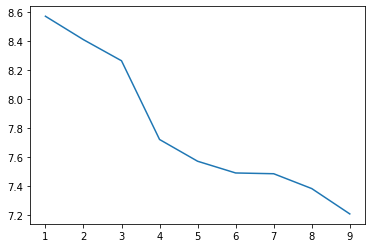

In [101]:
N=[1,2,3,4,5,6,7,8,9]
plt.plot(N,RMS)

In [ ]:
newdata=resize(data, (1000,1000), mode="reflect", anti_aliasing=True)
fig = plt.figure(figsize=(12,6))
plt.imshow(newdata, origin="lower", cmap='gray', aspect=0.5)              #vmax=100, vmin=-100
plt.colorbar()
nx=newdata.shape[1]
ny=newdata.shape[0]
print(nx)
longitude=[]
longitude_rad=[]
sinlat=[]
latitude=[]

R_sun = 6.96e10
d_sinlat=2/ny
dtr=np.pi/180
rtd=180/np.pi
dlon_rad=(360/nx)*dtr



for i in range (ny):
  sin_lat= -1+i*(2/ny)
  Latitude =np.arcsin(sin_lat)*rtd
  Latitude_rad=  (Latitude*dtr)
  
  latitude.append(Latitude)
  sinlat.append(sin_lat)
for j in range(nx):
    Longitude = 0+j*(360/nx)
    Longitude_rad=Longitude*dtr
    d_lon=360/nx
    dlon_rad=d_lon*dtr
    longitude.append(Longitude)
    longitude_rad.append(Longitude_rad)
  
Flux=(data)*(R_sun**2)*(d_sinlat)*(dlon_rad)
S= (R_sun**2)*(d_sinlat)*(dlon_rad)
print(S)
print(Flux)
print(np.subtract(longitude_rad[2:7], longitude_rad[1:6])
lon=np.linspace(min(longitude), max(longitude),1000)

lat= np.linspace(min(latitude), max(latitude),1000)

x,y=np.meshgrid(lon, lat)
flux= RegularGridInterpolator((latitude,longitude),Flux)((y,x))
Sinlat=np.linspace(min(sinlat), max(sinlat),1000)

X,Y=np.meshgrid(lon, Sinlat )
flux1= RegularGridInterpolator((sinlat,longitude),Flux)((Y,X))
#print(lat)
#print(Sinlat)
#print(lon.shape)
#print(flux)
print(flux1
fig=plt.figure(figsize=(12,6))
plt.pcolormesh(x,y,Data, cmap='gray')
plt.xlabel("carington longitutde", color="black", fontsize=14, fontstyle="oblique")
plt.ylabel("carington latitude", color="black", fontsize=14, fontstyle="oblique")
fig=plt.figure(figsize=(12,6))
plt.pcolormesh(X,Y,Data1, cmap='gray')     #, vmin=-1e19,vmax=1e19)
plt.colorbar()
plt.xlabel("carington longitutde", color="black", fontsize=14, fontstyle="oblique")
plt.ylabel("sin(lat)", color="black", fontsize=14, fontstyle="oblique")
sizes = ndimage.sum(binary_mask, labeled_array, range(1, num_features + 1))
sizes1 = ndimage.sum(binary_mask, labeled_array)
areathres=50
mask_filtered = np.zeros_like(binary_mask)

print(sizes1)
for i, size in enumerate(sizes):
    #print(f"{i+1}  {size}")
    
    if size >=areathres:
       mask_filtered[labeled_array == (i + 1)] = 1
